# Content Based Recommendation System for flipkart

## Recommendation Systems

According to the wikipedia definition recommendation system is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.

## Content Based Recommendation System.

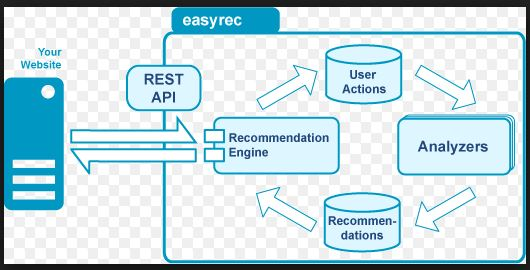

In this notebook I have used the Flipkart sales dataset. The main goal of the notebook is to design the recommendation system based on the description of the products.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
products = pd.read_csv('data/flipkart_com-ecommerce_sample.csv')

In [4]:
products.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


Looking at the first five rows of the data set we can find our data set is too lengthy.

In [5]:
len(products['product_name'])

20000

- Total number of products that we have in our dataset is exactly 20000. So it is not easy for use to know every individual products looking directly to them.

In [6]:
len(products['product_name'].unique()),len(products['uniq_id'].unique())

(12676, 20000)

- Products are repeated in our dataset. By using the above line of code we can see that our data set have 12676 unique products and 20000 unique id's.

In [7]:
products.shape

(20000, 15)

- Here we have 2000 rows and 15 columns. The next step is to look at the state of our data column.

In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

- Here we can clearly see that most of the values are in the object form.

In [9]:
products.isna().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

- Checking at our dataset some of the columns are null. Since we are only dealing with columns product_name and description we no need to play with the rest of the colums. so they can be dropped from our data set.

In [10]:
products['description'][0]

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

- This is the description of the very first product in our dataset.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features=None,
                     strip_accents='unicode',
                     analyzer='word',
                     min_df=10,
                     token_pattern=r'\w{1,}',
                     ngram_range=(1,3), # take the combination of 1-3 different kind of words
                     stop_words='english') # removes all the unnecessary characters like the,in etc.
products['description'] = products['description'].fillna('')

In [12]:
#fitting the description column.
tfv_matrix = tfv.fit_transform(products['description']) # converting everythinng to sparse matrix.

In [13]:
tfv_matrix

<20000x23315 sparse matrix of type '<class 'numpy.float64'>'
	with 1510389 stored elements in Compressed Sparse Row format>

- Looking at the above outcome, we can clearly see that our all values are converted into the spase matrix.

In [15]:
tfv_matrix.shape

(20000, 23315)

In [17]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix) # how description of first product is related to first product and so on.

In [18]:
sig[0]

array([0.76161217, 0.76159453, 0.76159494, ..., 0.76159416, 0.76159416,
       0.76159416])

In [20]:
indices = pd.Series(products.index,index=products['product_name']).drop_duplicates()

In [21]:
indices.head(20)

product_name
Alisha Solid Women's Cycling Shorts                                       0
FabHomeDecor Fabric Double Sofa Bed                                       1
AW Bellies                                                                2
Alisha Solid Women's Cycling Shorts                                       3
Sicons All Purpose Arnica Dog Shampoo                                     4
Eternal Gandhi Super Series Crystal Paper Weights  with Silver Finish     5
Alisha Solid Women's Cycling Shorts                                       6
FabHomeDecor Fabric Double Sofa Bed                                       7
dilli bazaaar Bellies, Corporate Casuals, Casuals                         8
Alisha Solid Women's Cycling Shorts                                       9
Ladela Bellies                                                           10
Carrel Printed Women's                                                   11
Sicons All Purpose Tea Tree Dog Shampoo                                  12

In [22]:
def product_recommendation(title,sig=sig):
    indx = indices[title]
    
    #getting pairwise similarity scores
    sig_scores = list(enumerate(sig[indx]))
    
    #sorting products
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    
    #10 most similar products score
    sig_scores = sig_scores[1:11]
    
    #product indexes
    product_indices = [i[0] for i in sig_scores]
    
    #Top 10 most similar products
    return products['product_name'].iloc[product_indices]

In [23]:
n=input("Enter the name of the product: ")
print("\nTop Recommended products are: \n")
print(product_recommendation(n).unique())

Enter the name of the product: Style Foot Bellies

Top Recommended products are: 

['Ladela Bellies' 'Klaur Melbourne Bellies' 'Mobiroy Bellies'
 'Oggo Deo Bellies' 'Bootwale Bellies']


### This is just a simple recommendation system developed using the flipkart dataset.